A lo largo de este notebook vamos a estar trabajando con una de las publicaciones de [Jason Brownlee en su web](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/). Os recomendamos echarle un vistazo y leer sus distintas publicaciones si os interesa el Machine Learning.


 # 18. Tests de Hipótesis Estadísticos en Python (Resumen)

En el día de ayer vimos algunos recursos necesarios para poder realizar un buen test de hipótesis. Esta mañana vamos a revisar algunos test de hipótesis (de los literalmente cientos que hay) que creemos os serán útiles en vuestro futuro laboral. 


## 18.1. Tests de Normalidad



Básicamente queremos comprobar si nuestros datos siguen una distribución Gaussiana (Normal).

### 18.1.1. Test de Shapiro-Wilk




**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son "Independientes e Idénticamente Distribuidas" (iid en adelante).

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: la muestra sigue una distribución Gaussiana. 
*   $H_{1}$: la muestra NO sigue una distribución Gaussiana. 

**Para más información...**
*   https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
*   https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test


In [ ]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.895, p=0.193
No podemos rechazar que siga una distribución Gaussiana


### 18.1.2. Test $K^2$ de D’Agostino 






**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: la muestra sigue una distribución Gaussiana. 
*   $H_{1}$: la muestra NO sigue una distribución Gaussiana. 

**Para más información...**
*   https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
*   https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test

In [ ]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=3.392, p=0.183
No podemos rechazar que siga una distribución Gaussiana


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### 18.1.3. Test de Anderson-Darling






**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: la muestra sigue una distribución Gaussiana. 
*   $H_{1}$: la muestra NO sigue una distribución Gaussiana. 

**Para más información...**
*   https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
*   https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

In [ ]:
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -3, -1.436, -10, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Sigue una Gaussiana para una significancia del %.1f%%' % (sl))
	else:
		print('No sigue una Gaussiana para una significancia del %.1f%%' % (sl))

stat=0.809
No sigue una Gaussiana para una significancia del 15.0%
No sigue una Gaussiana para una significancia del 10.0%
No sigue una Gaussiana para una significancia del 5.0%
No sigue una Gaussiana para una significancia del 2.5%
Sigue una Gaussiana para una significancia del 1.0%


## 18.2. Tests de Correlación

Ahora queremos comprobar si dos muestras están relacionadas entre ellas.

### 18.2.1. Coeficiente de Correlación de Pearson





(Como este no os suene...)
Sirve para comprobar la relación lineal entre dos muestras.

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones en cada muestra están distribuidas según una Gaussiana.
*   Que las observaciones en cada muestra tienen la misma varianza.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las muestras son independientes. 
*   $H_{1}$: existe una dependencia lineal entre las muestras. 

**Para más información...**
*   https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
*   https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
*   Los notebooks donde lo hemos usado.

In [ ]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.688, p=0.028
Probablemente dependientes


### 18.2.2. Coeficiente de Correlación de Spearman






Sirve para comprobar la relación monótona entre dos muestras.

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones de las muestras se pueden ordenar.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las muestras son independientes. 
*   $H_{1}$: existe una dependencia entre las muestras. 

**Para más información...**
*   https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
*   https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient


In [ ]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.855, p=0.002
Probablemente dependientes


### 18.2.3. Coeficiente de Correlación de Rango de Kendall (coeficiente Τ de Kendall)





Sirve para comprobar la relación monótona entre dos muestras.

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones de las muestras se pueden ordenar.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las muestras son independientes. 
*   $H_{1}$: existe una dependencia entre las muestras. 

**Para más información...**
*   https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html
*   https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient


In [ ]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.733, p=0.002
Probablemente dependientes


### 18.2.4. Test Chi-cuadrado $(χ^2)$





Sirve para comprobar la relación entre dos variables categóricas. Existen varios tipos distintos, pero nos centraremos en este.

**¿Qué debemos asumir?**
*   Que las observaciones que se usen para el cálculo de la tabla de contingencia son independientes.
*   Que tenemos al menos 25 o más ejemplos en cada casilla de la tabla de contingencia.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las muestras son independientes. 
*   $H_{1}$: existe una dependencia entre las muestras. 

**Para más información...**
*   https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
*   https://en.wikipedia.org/wiki/Chi-squared_test


In [ ]:
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.272, p=0.873
Probablemente independientes


## 18.3. Tests Estacionarios

En esta sección aprenderemos algunos tests para comprobar si una serie temporal es estacionaria o no.


### 18.3.1. Prueba de Dickey-Fuller aumentada (ADF)





Sirve para comprobar si una serie temporal tiene una raíz unitaria, es decir, si NO muestra una regresión hacia la media (tiene una tendencia o no).

**¿Qué debemos asumir?**
*   Que las observaciones están ordenadas temporalmente.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: tiene una raíz unitaria (serie no estacionaria).
*   $H_{1}$: no tiene una raíz unitaria (serie estacionaria). 

**Para más información...**
*   https://machinelearningmastery.com/time-series-data-stationary-python/
*   https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
*   https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

In [ ]:
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente no estacionaria')
else:
	print('Probablemente estacionaria')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


stat=0.517, p=0.985
Probablemente no estacionaria


### 18.3.2. Test Kwiatkowski–Phillips–Schmidt–Shin (KPSS)






Sirve para comprobar si una serie temporal tiene una raíz unitaria, es decir, si NO muestra una regresión hacia la media (tiene una tendencia o no).

**¿Qué debemos asumir?**
*   Que las observaciones están ordenadas temporalmente.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: no tiene una raíz unitaria (serie estacionaria).
*   $H_{1}$: tiene una raíz unitaria (serie no estacionaria). 

**Para más información...**
*   https://en.wikipedia.org/wiki/KPSS_test
*   https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html#statsmodels.tsa.stattools.kpss


In [ ]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente estacionaria')
else:
	print('Probablemente no estacionaria')

stat=0.410, p=0.073
Probablemente estacionaria


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


## 18.4. Tests de Hipótesis Paramétricos

Vamos a comparar datos en general para obtener algunos resultados sobre ellos.

### 18.4.1. Prueba t de Student





Comprueba si las medias de dos muestras independientes son significativamente distintas.

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones en cada muestra están distribuidas según una Gaussiana.
*   Que las observaciones en cada muestra tienen la misma varianza.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las medias de las muestras son iguales.
*   $H_{1}$: las medias de las muestras son distintas. 

**Para más información...**
*   https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
*   https://en.wikipedia.org/wiki/Student%27s_t-test

In [ ]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma media')
else:
	print('Probablemente tengan distinta media')

stat=-0.326, p=0.748
Probablemente tengan la misma media


### 18.4.2. Prueba t de Student Pareada






Comprueba si las medias de dos muestras pareadas son significativamente distintas.

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones en cada muestra están distribuidas según una Gaussiana.
*   Que las observaciones en cada muestra tienen la misma varianza.
*   Que las observaciones de cada muestra están emparejadas.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las medias de las muestras son iguales.
*   $H_{1}$: las medias de las muestras son distintas. 

**Para más información...**
*   https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
*   https://en.wikipedia.org/wiki/Student%27s_t-test


In [ ]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma media')
else:
	print('Probablemente tengan distinta media')

stat=-0.334, p=0.746
Probablemente tengan la misma media


### 18.4.3. Análisis de la Varianza (ANOVA)





Comprueba si las medias de dos muestras independientes son significativamente distintas.

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones en cada muestra están distribuidas según una Gaussiana.
*   Que las observaciones en cada muestra tienen la misma varianza.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las medias de las muestras son iguales.
*   $H_{1}$: una o más de las medias de las muestras son distintas. 

**Para más información...**
*   https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
*   https://en.wikipedia.org/wiki/Analysis_of_variance



In [ ]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma media')
else:
	print('Probablemente tengan distintas medias')

stat=0.096, p=0.908
Probablemente tengan la misma media


## 18.5. Tests de Hipótesis no Paramétricos

Vamos a comparar datos en general para obtener algunos resultados sobre ellos, aunque esta vez, sin conocer sus parámetros.

### 18.5.1. Prueba U de Mann-Whitney





Comprueba si las distribuciones de dos muestras independientes son la misma o no. 

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones se pueden ordenar.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las distribuciones de las muestras son la misma.
*   $H_{1}$: las distribuciones de las muestras son distintas.

**Para más información...**
*   https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
*   https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

In [ ]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=40.000, p=0.236
Probablemente tengan la misma distribución


### 18.5.2. Prueba de los rangos con signo de Wilcoxon





Comprueba si las distribuciones de dos muestras pareadas son la misma o no. 

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones se pueden ordenar.
*   Que las observaciones de cada muestra están pareadas.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las distribuciones de ambas muestras son la misma.
*   $H_{1}$: las distribuciones de ambas muestras son distintas.

**Para más información...**
*   https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
*   https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [ ]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=21.000, p=0.508
Probablemente tengan la misma distribución


[Wilcoxon example with Python](https://www.statology.org/wilcoxon-signed-rank-test-python/)

La prueba de los rangos con signo de Wilcoxon es una prueba no paramétrica 
para comparar el rango medio de dos muestras relacionadas y determinar 
si existen diferencias entre ellas. 
Se utiliza como alternativa a la prueba t de Student cuando no se puede 
suponer la normalidad de dichas muestras. Debe su nombre a Frank Wilcoxon, que la publicó en 1945.

In [ ]:
# H0: La distribución es igual para los dos grupos (provienen de la misma distribución)

# HA: La distribución no es igual para los dos grupos 

In [2]:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

In [3]:
from scipy.stats import wilcoxon

#perform the Wilcoxon-Signed Rank Test
wilcoxon(group1, group2)
stat, p = wilcoxon(group1, group2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')



stat=10.500, p=0.044
Probablemente tengan distinta distribución


In [4]:
import matplotlib.pyplot as plt


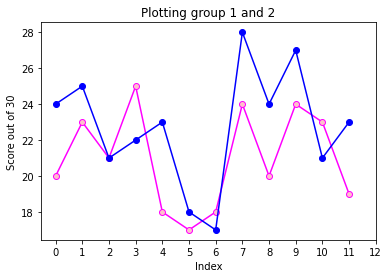

In [7]:
plt.plot(group1, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(group1)+1, 1)) #set the tick frequency on x-axis
plt.plot(group2, color='blue', marker='o',mfc='blue' ) #plot the data
plt.xticks(range(0,len(group1)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('Score out of 30') #set the label for y axis
plt.xlabel('Index') #set the label for x-axis
plt.title("Plotting group 1 and 2") #set the title of the graph
plt.show() #display the graph

### 18.5.3. Prueba de Kruskal-Wallis





Comprueba si las distribuciones de dos o más muestras independientes son la misma o no. 

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones se pueden ordenar.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las distribuciones de las muestras son la misma.
*   $H_{1}$: las distribuciones de una o más muestras son distintas.

**Para más información...**
*   https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
*   https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

In [ ]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=0.571, p=0.450
Probablemente tengan la misma distribución


### 18.5.4. Prueba de Friedman





Comprueba si las distribuciones de dos o más muestras pareadas son la misma o no. 

**¿Qué debemos asumir?**
*   Que las observaciones de las muestras son iid.
*   Que las observaciones se pueden ordenar.
*   Que las observaciones de cada muestra están pareadas.

**¿Cuáles son nuestras hipótesis?**
*   $H_{0}$: las distribuciones de todas las muestras son la misma.
*   $H_{1}$: las distribuciones de una o más muestras son distintas.

**Para más información...**
*   https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html
*   https://en.wikipedia.org/wiki/Friedman_test

In [ ]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=0.800, p=0.670
Probablemente tengan la misma distribución


# Ejercicio: 

Cada uno de vosotros tiene que tomar unos datos (lógicos) con los que testear, al menos, uno de cada uno de métodos implementados en este notebook. Por supuesto existen muchos más, pero a modo resumen nos quedaremos con estos (por supuesto quien quiera ampliar sus conocimientos sobre este tema es bienvenido a ello). 